# 연구과제(2) 풀이

## #01. 준비작업

### [1] 패키지 가져오기

In [66]:
import warnings
warnings.filterwarnings(action='ignore')

# Intel SKlearn 하드웨어 가속 패치 설정
import sys
if sys.platform == 'win32':
    from sklearnex import patch_sklearn
    patch_sklearn()

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

### [2] 데이터 가져오기

In [67]:
origin = my_read_excel("https://data.hossam.kr/mldata/mushrooms.xlsx", categories=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

## #02. 데이터 전처리 + 탐색적 데이터 분석

### [1] 데이터 라벨링

#### (1) 컬럼 이름 리스트 생성

In [68]:
columns = list(origin.columns)
print(columns)

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


#### (2) 모든 컬럼에 대한 라벨링 수행

In [69]:
df = my_labelling(origin, *columns)
my_pretty_table(df.head())

+----+---------+-------------+---------------+-------------+-----------+--------+-------------------+----------------+-------------+--------------+---------------+--------------+----------------------------+----------------------------+--------------------------+--------------------------+-------------+--------------+---------------+-------------+---------------------+--------------+-----------+
|    |   class |   cap-shape |   cap-surface |   cap-color |   bruises |   odor |   gill-attachment |   gill-spacing |   gill-size |   gill-color |   stalk-shape |   stalk-root |   stalk-surface-above-ring |   stalk-surface-below-ring |   stalk-color-above-ring |   stalk-color-below-ring |   veil-type |   veil-color |   ring-number |   ring-type |   spore-print-color |   population |   habitat |
|----+---------+-------------+---------------+-------------+-----------+--------+-------------------+----------------+-------------+--------------+---------------+--------------+------------------------

### [2] 스피어만 상관분석

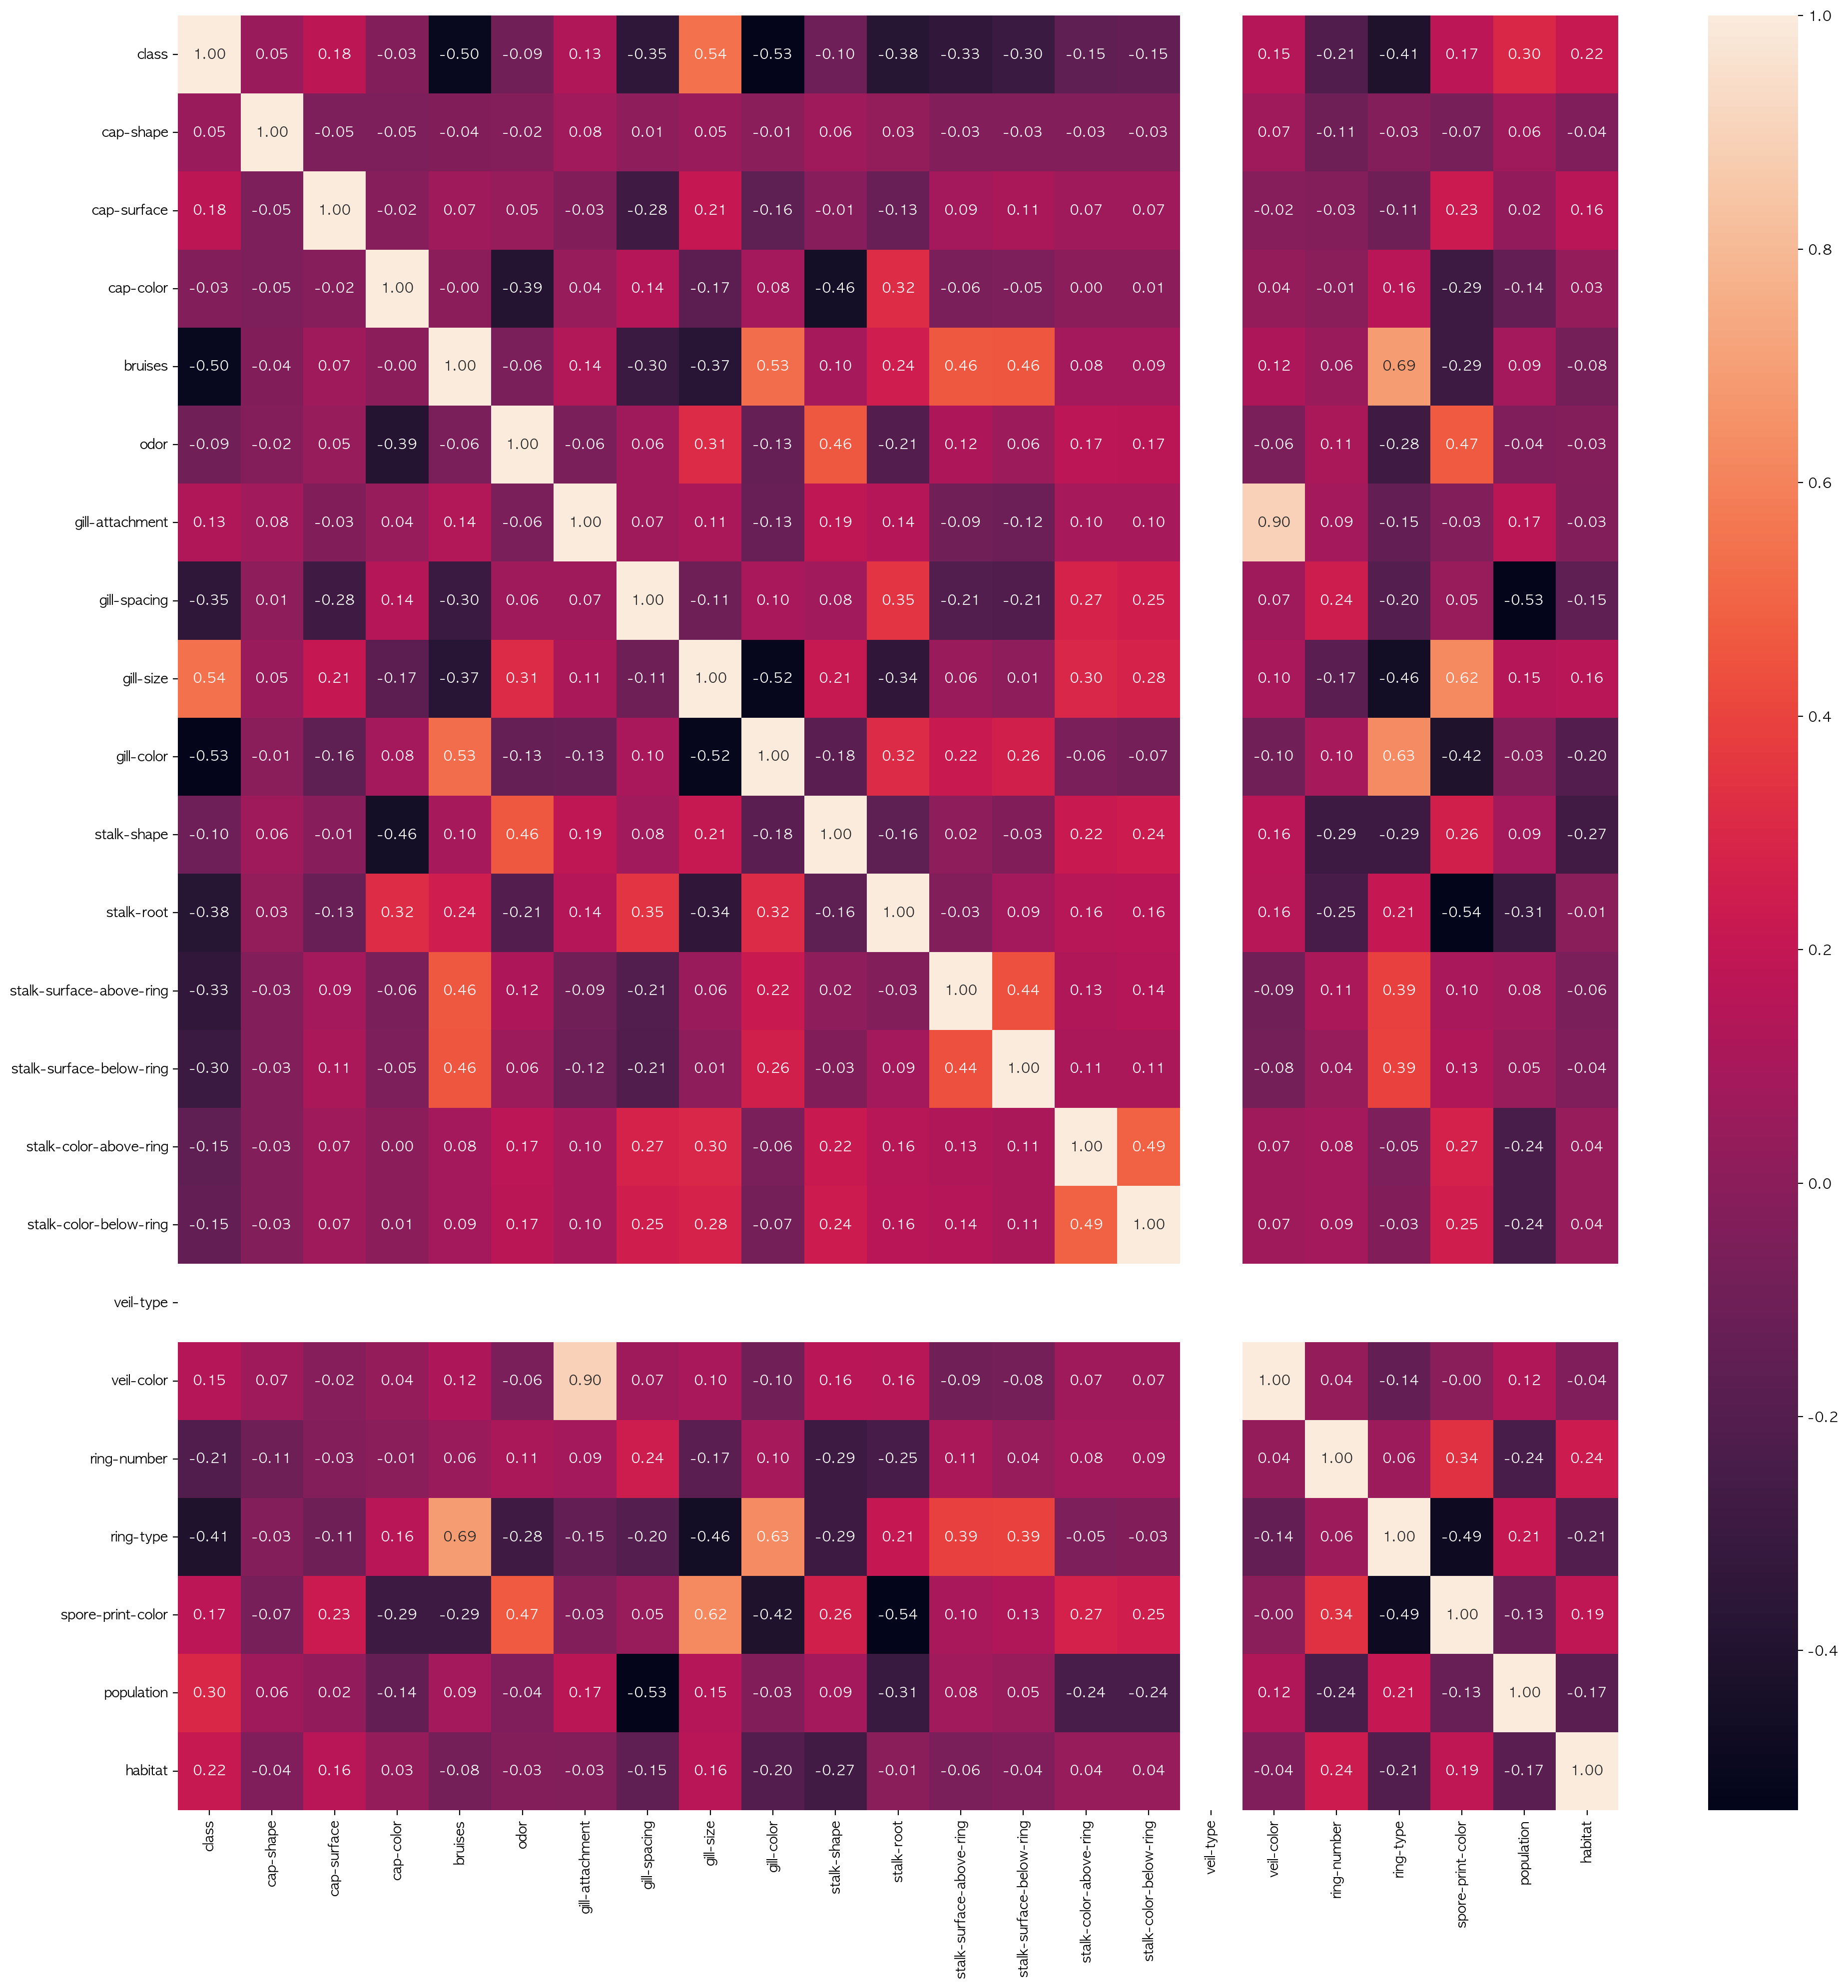

+----------------------------------------------------------+---------------+--------------+----------+
|                                                          |   correlation |      p-value | result   |
|----------------------------------------------------------+---------------+--------------+----------|
| ('class', 'cap-shape')                                   |     0.0529506 |   1.7951e-06 | True     |
| ('class', 'cap-surface')                                 |      0.178446 |  4.16672e-59 | True     |
| ('class', 'cap-color')                                   |    -0.0313841 |   0.00466921 | True     |
| ('class', 'bruises')                                     |      -0.50153 |            0 | True     |
| ('class', 'odor')                                        |    -0.0935516 |  2.92931e-17 | True     |
| ('class', 'gill-attachment')                             |        0.1292 |  1.39319e-31 | True     |
| ('class', 'gill-spacing')                                |     -0.34838

In [70]:
my_correlation(df, dpi=200, figsize=(20, 20))

## #03. 분석 모형 비교

### [1] 모든 데이터에 대한 비교

In [71]:
x_train, x_test, y_train, y_test = my_train_test_split(df, yname='class', test_size=0.2, scalling=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6499, 22), (1625, 22), (6499,), (1625,))

In [72]:
my_classification(x_train, y_train, x_test, y_test)

<class 'sklearn.svm._classes.SVC'>는 n_jobs를 허용하지 않음<class 'sklearn.naive_bayes.GaussianNB'>는 n_jobs를 허용하지 않음



+----------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------+
|                      |   의사결정계수(Pseudo R2) |   정확도(Accuracy) |   정밀도(Precision) |   재현율(Recall) |   위양성율(Fallout) |   특이성(TNR) |   F1 Score |      AUC |
|----------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------|
| GaussianNB           |                         0 |           0.906462 |            0.899215 |         0.901575 |           0.0892236 |      0.910776 |   0.900393 | 0.938316 |
| LogisticRegression   |                  0.810906 |           0.961231 |            0.961691 |         0.955381 |           0.0336037 |      0.966396 |   0.958525 | 0.990969 |
| KNeighborsClassifier |                         0 |                  1 |                   1 |                1 |                   0 | 

{'GaussianNB': GaussianNB(),
 'LogisticRegression': LogisticRegression(C=100, max_iter=1000, n_jobs=-1),
 'KNeighborsClassifier': KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=3),
 'SVC': SVC(C=1, degree=5, kernel='poly')}

### [2] 상관계수가 없는 `veil-type` 제거

In [73]:
df2 = df.drop('veil-type', axis=1)

x_train, x_test, y_train, y_test = my_train_test_split(df2, yname='class', test_size=0.2, scalling=False)

my_classification(x_train, y_train, x_test, y_test)

<class 'sklearn.svm._classes.SVC'>는 n_jobs를 허용하지 않음
<class 'sklearn.naive_bayes.GaussianNB'>는 n_jobs를 허용하지 않음
+----------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------+
|                      |   의사결정계수(Pseudo R2) |   정확도(Accuracy) |   정밀도(Precision) |   재현율(Recall) |   위양성율(Fallout) |   특이성(TNR) |   F1 Score |      AUC |
|----------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------|
| GaussianNB           |                         0 |           0.906462 |            0.899215 |         0.901575 |           0.0892236 |      0.910776 |   0.900393 | 0.938316 |
| LogisticRegression   |                  0.810716 |           0.961231 |            0.961691 |         0.955381 |           0.0336037 |      0.966396 |   0.958525 | 0.990987 |
| KNeighborsClassifier |   

{'GaussianNB': GaussianNB(),
 'LogisticRegression': LogisticRegression(C=100, max_iter=1000, n_jobs=-1),
 'KNeighborsClassifier': KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=3),
 'SVC': SVC(C=1, degree=4, kernel='poly')}

### [3] 상관계수가 낮은 변수들 제거

상관계수가 `2` 이하인 항목들 제거

In [74]:
df3 = df.drop(['veil-type', 'gill-attachment', 'cap-surface', 'stalk-shape', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'spore-print-color'], axis=1)

x_train, x_test, y_train, y_test = my_train_test_split(df3, yname='class', test_size=0.2, scalling=False)

estimators = my_classification(x_train, y_train, x_test, y_test)

<class 'sklearn.svm._classes.SVC'>는 n_jobs를 허용하지 않음<class 'sklearn.naive_bayes.GaussianNB'>는 n_jobs를 허용하지 않음

+----------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------+
|                      |   의사결정계수(Pseudo R2) |   정확도(Accuracy) |   정밀도(Precision) |   재현율(Recall) |   위양성율(Fallout) |   특이성(TNR) |   F1 Score |      AUC |
|----------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------|
| GaussianNB           |                         0 |           0.910154 |            0.950292 |         0.853018 |           0.0393975 |      0.960603 |   0.899032 | 0.935226 |
| LogisticRegression   |                  0.715002 |           0.931692 |            0.946502 |         0.905512 |           0.0451912 |      0.954809 |   0.925553 | 0.977424 |
| KNeighborsClassifier |   

### [4] 가장 좋은 성능을 보여준 모델의 결과 확인

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |            1 |            1 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |            1 |            1 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |            1 |            1 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |            0 |            0 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |            1 |            1 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |            1 |            1 | 정밀도와 재현율의 조화평균                                |
| AUC               |            1 |            1 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+--

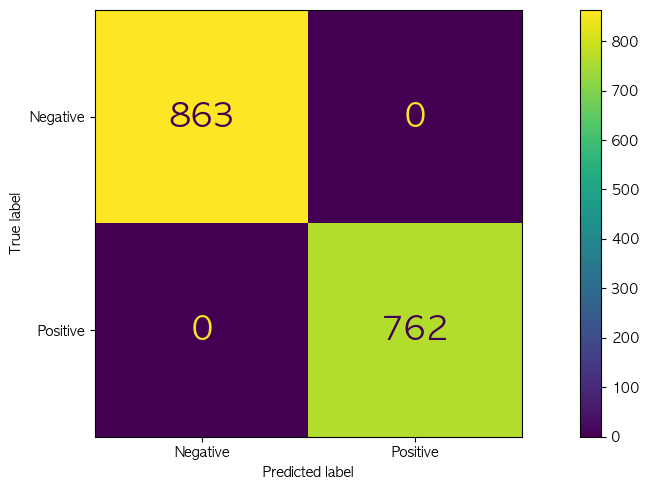

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


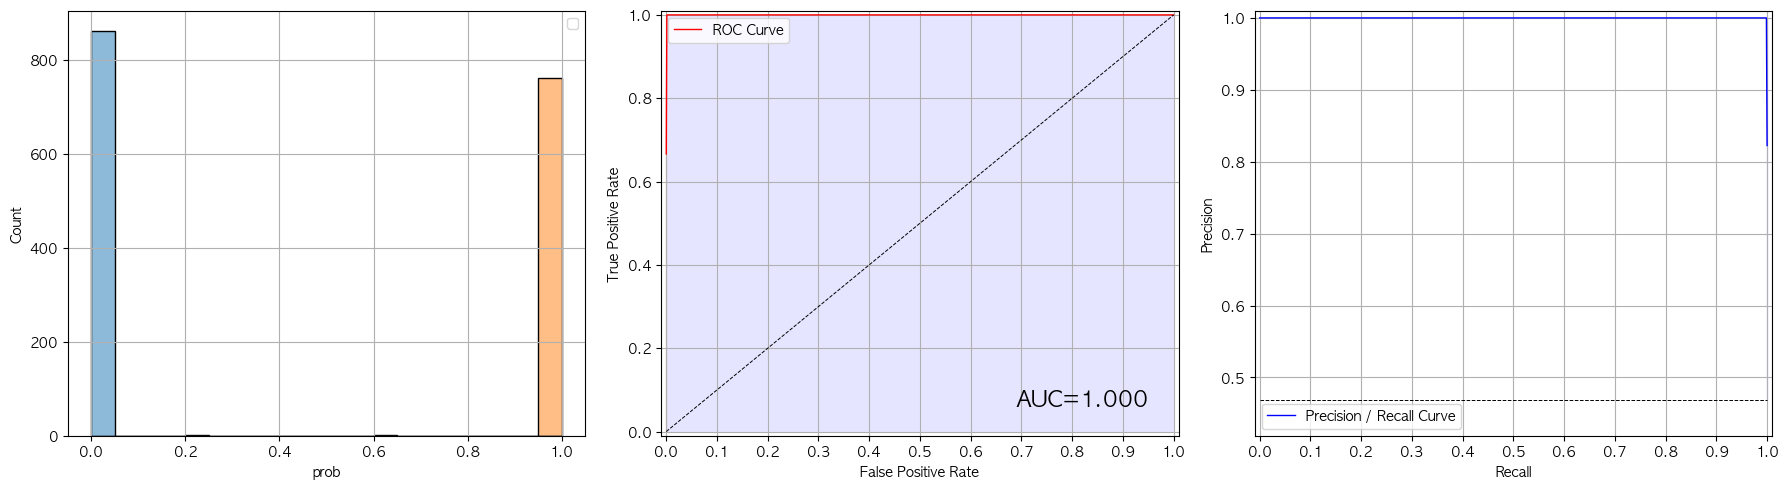


[학습곡선]


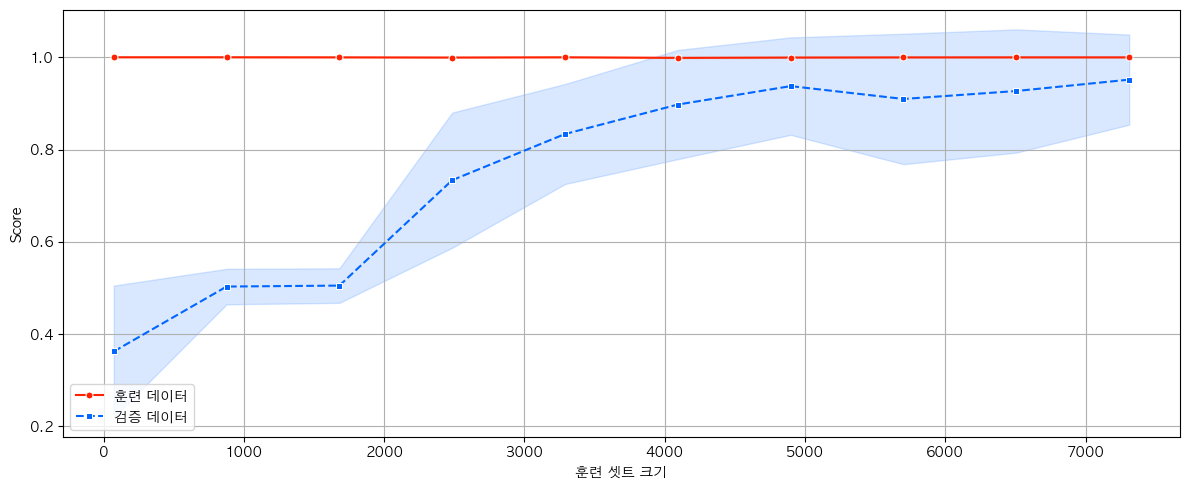

In [75]:
my_classification_result(estimators['KNeighborsClassifier'], x_train, y_train, x_test, y_test)

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |            1 |            1 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |            1 |            1 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |            1 |            1 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |            0 |            0 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |            1 |            1 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |            1 |            1 | 정밀도와 재현율의 조화평균                                |
+-------------------+--------------+--------------+-------------------------------------------------

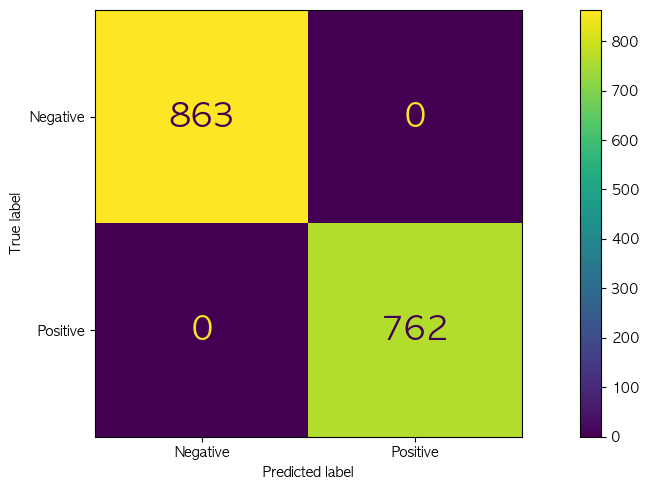


[학습곡선]


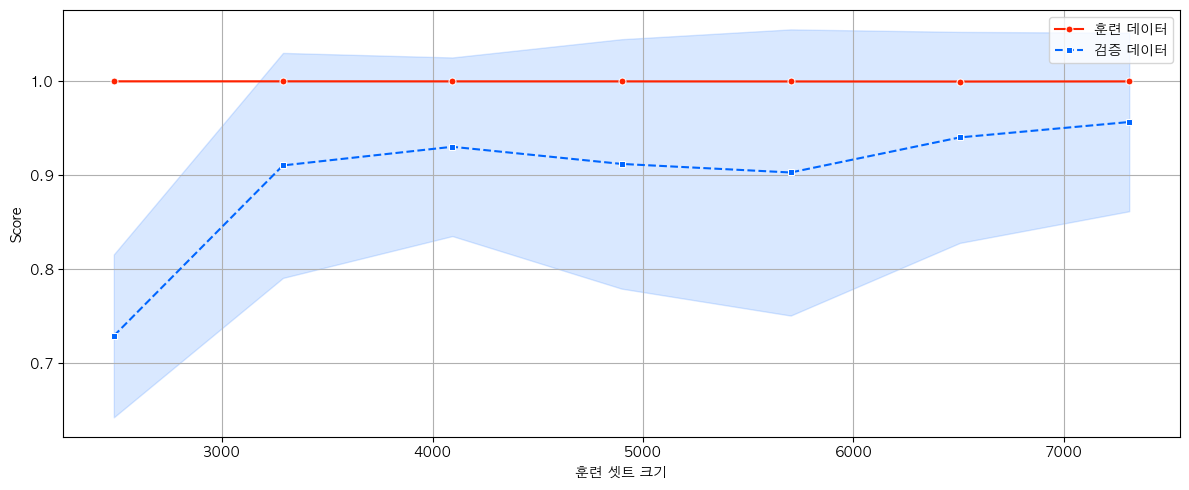

In [76]:
my_classification_result(estimators['SVC'], x_train, y_train, x_test, y_test)